In [290]:
import warnings
warnings.filterwarnings('ignore')

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [357]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [270]:
data = pd.read_csv('data.csv')
data.head(5)

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


In [271]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [272]:
X = data.drop('Grant.Status', axis=1)
y = data['Grant.Status']

In [273]:
numeric_cols = [
    'RFCD.Percentage.1', 
    'RFCD.Percentage.2', 
    'RFCD.Percentage.3', 
    'RFCD.Percentage.4', 
    'RFCD.Percentage.5', 
    'SEO.Percentage.1', 
    'SEO.Percentage.2', 
    'SEO.Percentage.3', 
    'SEO.Percentage.4', 
    'SEO.Percentage.5',
    'Year.of.Birth.1', 
    'Number.of.Successful.Grant.1', 
    'Number.of.Unsuccessful.Grant.1'
]

In [274]:
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

In [275]:
data.dropna().shape # gonna lose too much data, won't do this

(213, 39)

In [276]:
X_real_zeros = data[numeric_cols].fillna(value=0)
X_real_mean = data[numeric_cols].fillna(value=data[numeric_cols].mean())
X_cat = data[categorical_cols].fillna('NA', axis=0).astype(str) #.applymap(str)

In [278]:
encoder = DictVectorizer(sparse=False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())

In [279]:
X_train_real_zeros, X_test_real_zeros = train_test_split(X_real_zeros, test_size=0.3, random_state=0)
X_train_real_mean, X_test_real_mean = train_test_split(X_real_mean, test_size=0.3, random_state=0)
X_train_cat_oh, X_test_cat_oh = train_test_split(X_cat_oh, test_size=0.3, random_state=0)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=0)

In [280]:
(X_train_real_zeros, X_test_real_zeros, 
 X_train_real_mean, X_test_real_mean, 
 X_train_cat_oh, X_test_cat_oh, 
 y_train, y_test) = train_test_split(X_real_zeros, X_real_mean, X_cat_oh, y, test_size=0.3, random_state=0)

In [281]:
X_train_zeros = np.hstack((X_train_real_zeros, X_train_cat_oh))
X_train_mean = np.hstack((X_train_real_mean, X_train_cat_oh))
X_test_zeros = np.hstack((X_test_real_zeros, X_test_cat_oh))
X_test_mean = np.hstack((X_test_real_mean, X_test_cat_oh))

In [282]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

In [283]:
estimator = LogisticRegression()
clf_zeros = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3)
clf_zeros.fit(X_train_zeros, y_train)
clf_zeros.best_estimator_

LogisticRegression(C=10)

In [284]:
estimator = LogisticRegression()
clf_mean = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3)
clf_mean.fit(X_train_mean, y_train)
clf_mean.best_estimator_

LogisticRegression(C=0.5)

In [285]:
y_zeros = clf_zeros.predict_proba(X_test_zeros)[:,-1]
roc_auc_zeros = roc_auc_score(y_test, y_zeros)
roc_auc_zeros

0.8014486154196432

In [293]:
y_mean = clf_mean.predict_proba(X_test_mean)[:,-1]
roc_auc_mean = roc_auc_score(y_test, y_mean)
roc_auc_mean

0.7951131657326416

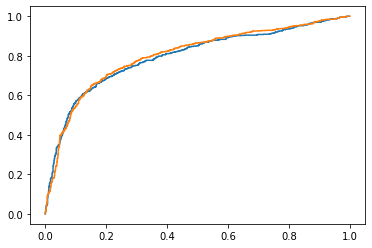

In [296]:
fpr_mean, tpr_mean, thresholds_mean = roc_curve(y_test, y_mean)
fpr_zeros, tpr_zeros, thresholds_zeros = roc_curve(y_test, y_zeros)
plt.plot(fpr_mean, tpr_mean)
plt.plot(fpr_zeros, tpr_zeros)

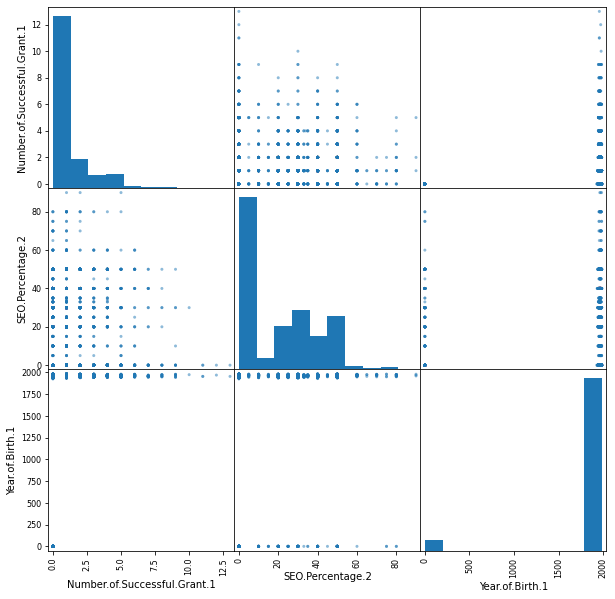

In [307]:
cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
pd.plotting.scatter_matrix(X_train_real_zeros[cols], alpha=0.5, figsize=(10, 10));

In [318]:
scaler = StandardScaler()
X_train_real_scaled = scaler.fit_transform(X_train_real_zeros)
X_test_real_scaled = scaler.transform(X_test_real_zeros)

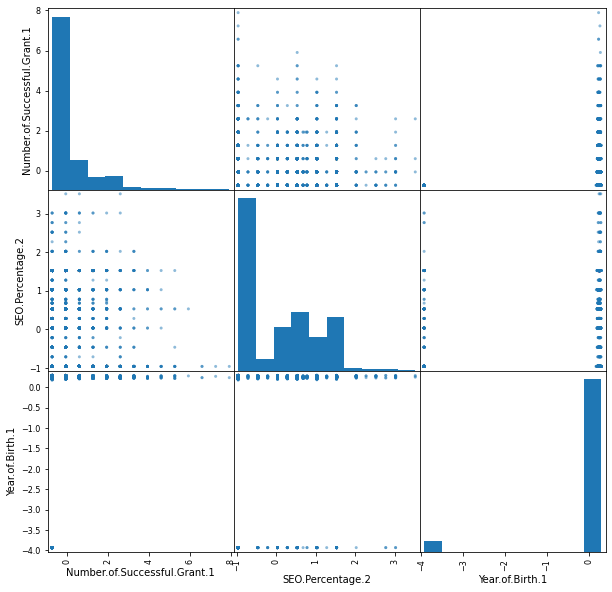

In [325]:
X_train_real_scaled = pd.DataFrame(X_train_real_scaled, columns=numeric_cols)
cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
pd.plotting.scatter_matrix(X_train_real_scaled[cols], alpha=0.5, figsize=(10, 10));

In [326]:
X_train_scaled = np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_scaled = np.hstack((X_test_real_scaled, X_test_cat_oh))

In [328]:
estimator = LogisticRegression()
clf_scaled = GridSearchCV(estimator, param_grid, cv=3)
clf_scaled.fit(X_train_scaled, y_train)
clf_scaled.best_estimator_

LogisticRegression(C=0.05)

In [331]:
y_scaled = clf_scaled.predict_proba(X_test_scaled)[:,1]
roc_auc_scaled = roc_auc_score(y_test, y_scaled)
roc_auc_scaled

0.8851594565867021

In [332]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

2316
1884


In [337]:
estimator = LogisticRegression(class_weight='balanced')
clf_balanced = GridSearchCV(estimator, param_grid, cv=3)
clf_balanced.fit(X_train_scaled, y_train)
clf_balanced.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced')

In [340]:
y_balanced = clf_balanced.predict_proba(X_test_scaled)[:,1]
roc_auc_balanced = roc_auc_score(y_test, y_balanced)
roc_auc_balanced

0.8872147655574267

In [343]:
(X_train_real_stratify, 
 X_test_real_stratify, 
 X_train_cat_stratify, 
 X_test_cat_stratify, 
 y_train_stratify, 
 y_test_stratify) = train_test_split(X_real_zeros, X_cat_oh, y, test_size=0.3, random_state=0, stratify=y)

In [347]:
scaler = StandardScaler()
X_train_real_stratify_scaled = scaler.fit_transform(X_train_real_stratify)
X_test_real_stratify_scaled = scaler.transform(X_test_real_stratify)

In [348]:
X_train_stratify = np.hstack([X_train_real_stratify_scaled, X_train_cat_stratify])
X_test_stratify = np.hstack([X_test_real_stratify_scaled, X_test_cat_stratify])

In [352]:
estimator = LogisticRegression(class_weight='balanced')
clf_stratify = GridSearchCV(estimator, param_grid, cv=3)
clf_stratify.fit(X_train_stratify, y_train_stratify)
clf_stratify.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced')

In [356]:
y_stratify = clf_stratify.predict_proba(X_test_stratify)[:, 1]
roc_auc_stratify = roc_auc_score(y_test_stratify, y_stratify)
roc_auc_stratify

0.8794133964245021

In [361]:
transform = PolynomialFeatures(2)
X_train_real_poly = transform.fit_transform(X_train_real_stratify)
X_test_real_poly = transform.fit_transform(X_test_real_stratify)

In [366]:
scaler = StandardScaler()
X_train_real_poly_scaled = scaler.fit_transform(X_train_real_poly)
X_test_real_poly_scaled = scaler.transform(X_test_real_poly)

In [367]:
X_train_poly = np.hstack([X_train_real_poly_scaled, X_train_cat_stratify])
X_test_poly = np.hstack([X_test_real_poly_scaled, X_test_cat_stratify])

In [371]:
estimator = LogisticRegression(fit_intercept=False, class_weight='balanced')
clf_poly = GridSearchCV(estimator, param_grid, cv=3)
clf_poly.fit(X_train_poly, y_train_stratify)
clf_poly.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', fit_intercept=False)

In [372]:
y_poly = clf_poly.predict_proba(X_test_poly)[:,1]
roc_auc_poly = roc_auc_score(y_test_stratify, y_poly)
roc_auc_poly

0.8869888147517899

In [380]:
estimator = LogisticRegression(penalty='l1', class_weight='balanced', solver='liblinear')
clf_lasso = GridSearchCV(estimator, param_grid, cv=3)
clf_lasso.fit(X_train_stratify, y_train_stratify)
clf_lasso.best_estimator_

LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [382]:
y_lasso = clf_lasso.predict_proba(X_test_stratify)[:,1]
roc_auc_lasso = roc_auc_score(y_test_stratify, y_lasso)
roc_auc_lasso

0.8765934500619468

In [397]:
lasso_coefs = clf_lasso.best_estimator_.coef_
lasso_coefs

array([[ 0.01134456,  0.04098862, -0.08882055, ...,  0.76177406,
         0.        ,  0.3464476 ]])

In [402]:
zero_coefs = np.where(lasso_coefs == 0)[1].tolist()
zero_coefs[:5], len(zero_coefs)

([4, 6, 7, 14, 16], 5086)

In [403]:
list(filter(lambda x: x < 13, zero_coefs))

[4, 6, 7]